<a href="https://colab.research.google.com/github/PILARFQ/POKEMONAPP/blob/master/Prototipo_Grupo_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

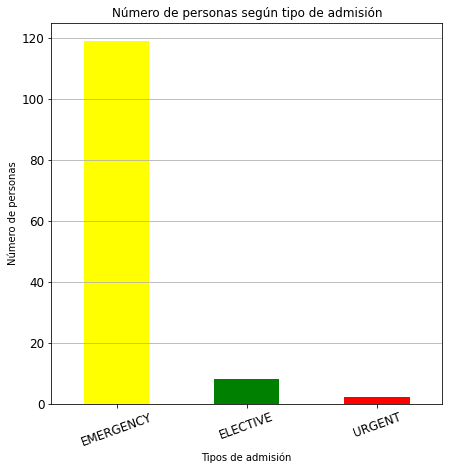

,Datos de pacientes
subject_id,10006
hadm_id,142345
admi_date,2164-10-23
admi_time,21:09:00
dischtime,2164-11-01 17:15:00
death_date,0000-00-00
death_time,00:00:00
admission_type,EMERGENCY
admission_location,EMERGENCY ROOM ADMIT
discharge_location,HOME HEALTH CARE


In [ ]:
#Importando librerías
import pandas as pd
from plotly import graph_objects as go
import matplotlib.pyplot as plot

#Leyendo los datos
data = pd.read_csv('ADMISSIONS.csv')
type(data)

#Eliminando columnas con datos irrelevantes
data = data.drop(['language','religion', 'marital_status', 'ethnicity', 'has_chartevents_data'], axis=1)

#Separando columna "admittime"
data["admittime"] = pd.to_datetime(data['admittime'])
data["admi_date"] = data["admittime"].dt.date
data["admi_time"] = data["admittime"].dt.time

#Eliminando columna "admittime"
data = data.drop(['admittime'], axis=1)

#Separando columna "deathtime"
data["deathtime"] = pd.to_datetime(data['deathtime'])
data["death_date"] = data["deathtime"].dt.date
data["death_time"] = data["deathtime"].dt.time

#Eliminando columna "deathtime"
data = data.drop(['deathtime'], axis=1)

#Ordenando columnas
data = data.reindex(columns=['row_id','subject_id','hadm_id','admi_date','admi_time','dischtime','death_date','death_time','admission_type','admission_location','discharge_location','insurance','edregtime','edouttime','diagnosis','hospital_expire_flag'])

#Completando valores faltantes
data["admi_date"].fillna("0000-00-00", inplace=True)
data["admi_time"].fillna("00:00:00", inplace=True)
data["death_date"].fillna("0000-00-00", inplace=True)
data["death_time"].fillna("00:00:00", inplace=True)

#print(data.head())

#Creando gráfico de barras de tipos de admisión
data['admission_type'].value_counts()
data['admission_type'].value_counts().plot(kind="bar", fontsize = 12, color=['yellow', 'green', 'red'], figsize=(7,7))
plot.xticks(rotation = 20)
plot.xlabel('Tipos de admisión')
plot.ylabel('Número de personas')
plot.title('Número de personas según tipo de admisión')
plot.grid(axis='y')
plot.savefig('adm-type.png')
plot.show()

#Creando gráfico de embudo de ADMISSION_LOCATION 
fig = go.Figure(go.Funnel( 
    y = ("EMERGENCY ROOM ADMIT","TRANSFER FROM HOSP/EXTRAM","CLINIC REFERRAL/PREMATURE", "PHYS REFERRAL/NORMAL DELI", "TRANSFER FROM SKILLED NUR"),
    x = data.admission_location.value_counts(),
   # textinfo = "value", title = {"position": "top left", "text": "Sales of Sale Person B in U.S."}
    textposition = "inside",
    textinfo = "value+percent total", 
    opacity = 0.85, marker = {"color": ["deepskyblue", "lightsalmon", "tan", "teal", "silver"],
    "line": {"width": [4, 2, 2, 3, 1, 1], "color": ["wheat", "wheat", "wheat", "wheat", "wheat"]}},
    connector = {"line": {"color": "royalblue", "dash": "dot", "width": 4}},
    textfont = {"family": "Old Standard TT, serif", "size": 13, "color": "black"})
    )
fig.update_layout(title_text='Porcentaje de ubicación previa del paciente antes de llegar al hospital', title_xanchor="auto")
fig.show()

#Creando cuadro de datos de cada paciente
data_subject = data[data["subject_id"] == 10006]
data_subject = data_subject.transpose()
data_subject = data_subject.drop(['row_id'], axis=0)
data_subject = data_subject.rename(columns={0:'Datos de pacientes'})

#Dando formato al cuadro de pacientes
headers = {
    "selector": "th:not(.index_name)",
    "props": "background-color: skyblue; color: black;"
}
properties = {"border": "1px solid skyblue", "color": "white", "font-size": "14px"}
data_subject.style.format(precision=2).set_table_styles([headers]).set_properties(**properties)
